<a href="https://colab.research.google.com/github/aryanfarswan77/prasunet/blob/main/K_Means_Clustering_to_Group_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Implement a K-Means Clustering model to group different customers based on their Gender, Age, Annual Income, Spending Score

Input:
* Age of the Customers
* Gender of the Customers
* Annual Income of the Customers
* Spending Score of the Customers

Output:
* Divison of the Customers in different groups.

## Data Collection
Source: [Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv)

###Importing the Dataset

In [ ]:
import pandas as pd
customer = pd.read_csv("/content/Mall_Customers.csv")

##Data Pre-processing

### Understanding Dataset

In [ ]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Data Cleaning

In [ ]:
# Removing Irrelavant Columns
customer= customer.drop(['CustomerID'], axis=1)
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###Insights from Data

In [ ]:
customer.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Checking for Null Values

In [ ]:
print(customer.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Checking for Duplicate Samples

In [ ]:
duplicate_rows = customer[customer.duplicated()]
# Print duplicate rows for inspection
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


### Checking for Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

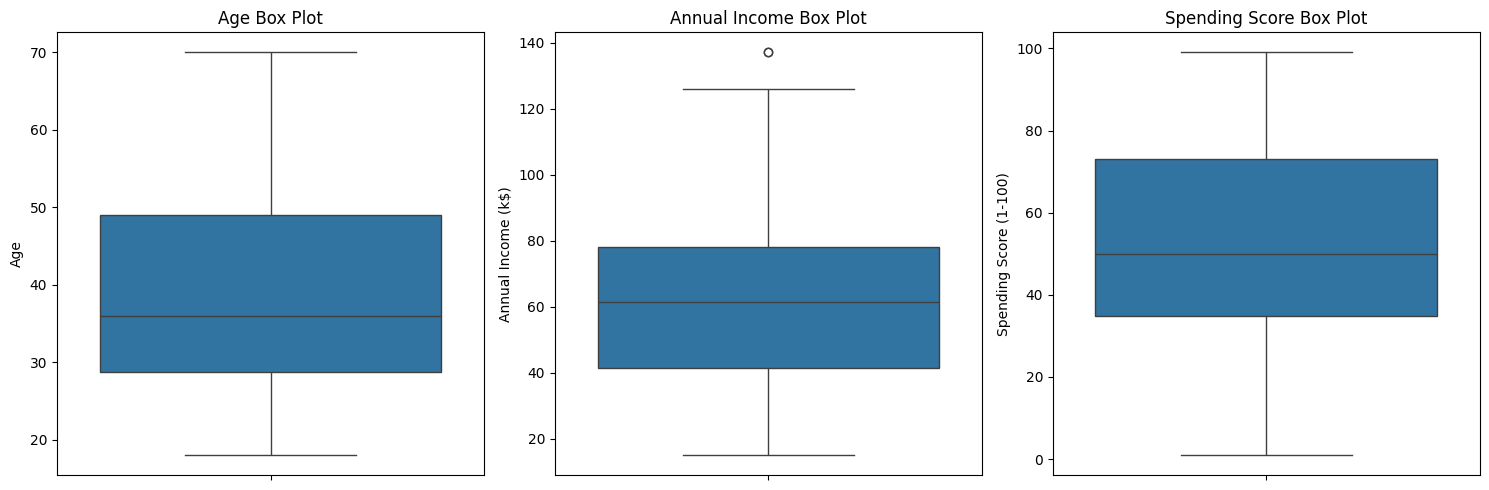

In [ ]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(customer['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(customer['Annual Income (k$)'])
plt.title('Annual Income Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(customer['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()

###Visualizing Data

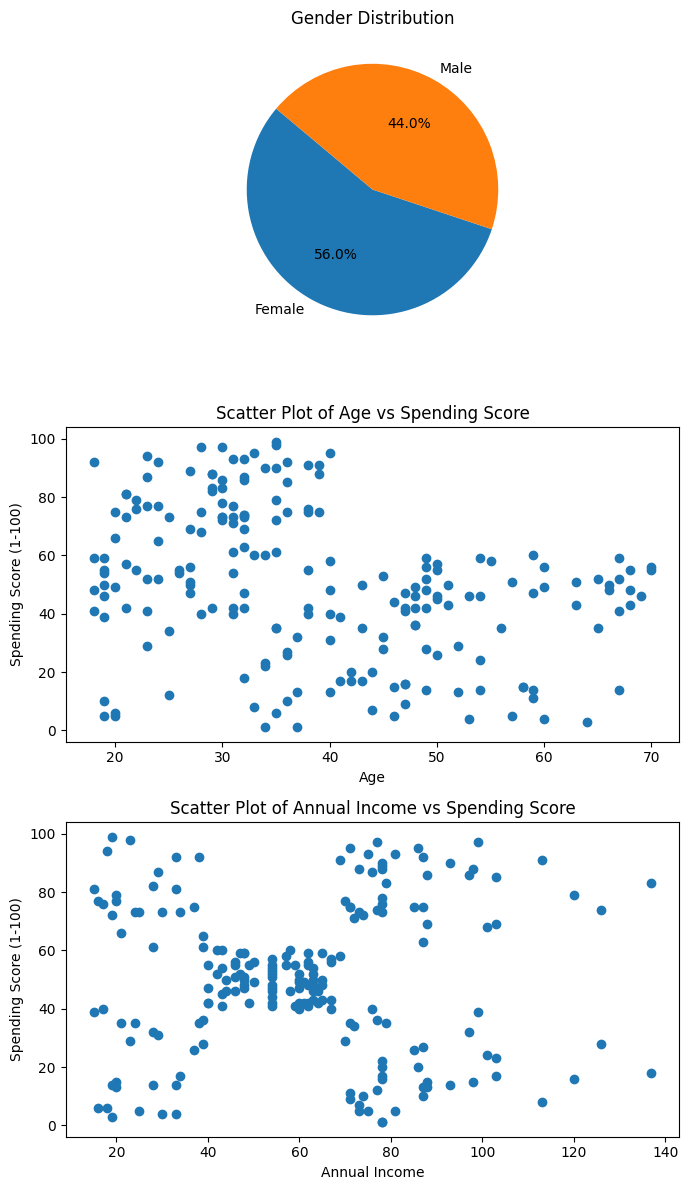

In [ ]:
# Plot scatter plots between different features
plt.figure(figsize=(7,12))

# Gender Distribution
plt.subplot(3,1,1)
gender_counts = customer["Gender"].value_counts().reset_index()
plt.pie(gender_counts["count"],labels=gender_counts["Gender"], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show
# Age vs Spending Score
plt.subplot(3,1,2)
plt.scatter(customer['Age'], customer['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Age vs Spending Score')

# Annual Income vs Spending Score
plt.subplot(3,1,3)
plt.scatter(customer['Annual Income (k$)'], customer['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')

plt.tight_layout()
plt.show()

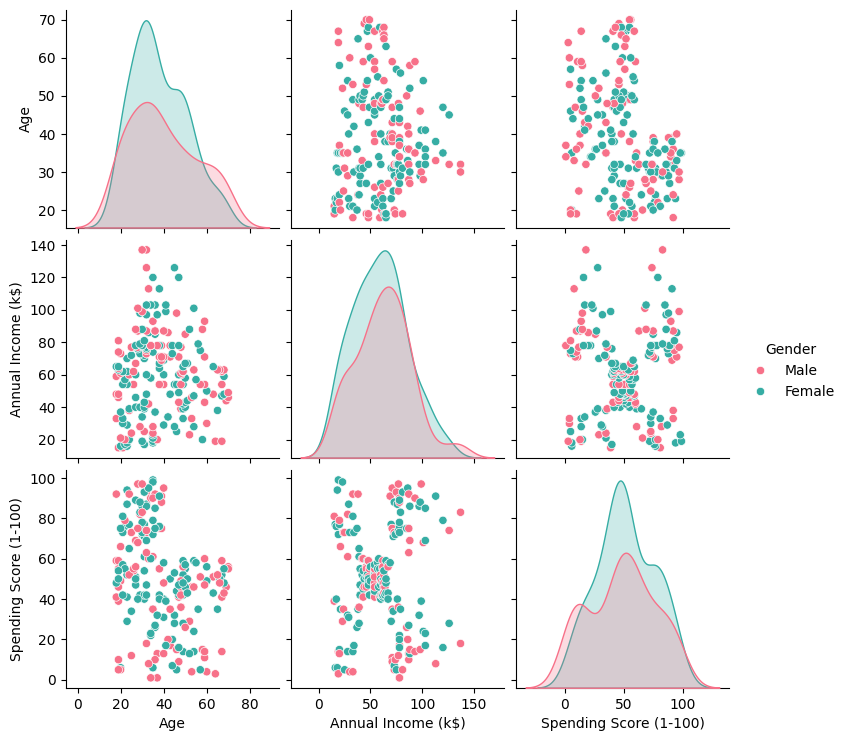

In [ ]:
# Pairplot of each features with gender
sns.pairplot(customer,hue="Gender",palette='husl')
plt.show()

### Normalizing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Transforming Object type coloumns into labels
label_encoder = LabelEncoder()
customer['Gender'] = label_encoder.fit_transform(customer['Gender'])
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Building the Model
Using K-Means clustering for customer segmentation based on:

1. Age and Spending Score
2. Annual Income and Spending Score
3. Age, Annual Income, and Spending Score

Then evaluating the each model using the Silhouette Scores.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1. Age and Spending Score

In [ ]:
# Filtering the age and spending score from the dataset

X_1 = customer[['Age', 'Spending Score (1-100)']].iloc[:, :].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

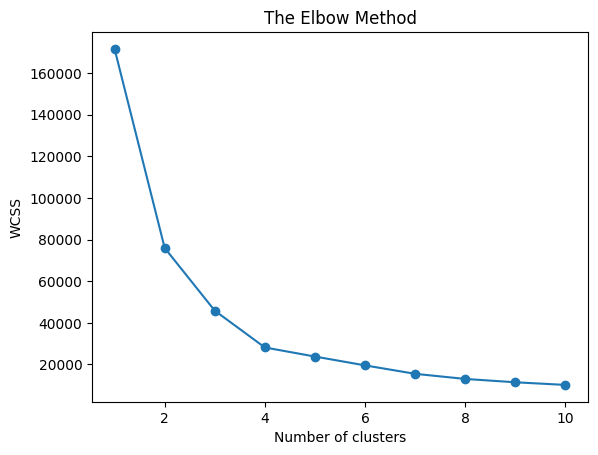

In [ ]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 4.

In [ ]:
### Training the K-Means model on the X_1 dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_1_kmeans = kmeans.fit_predict(X_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


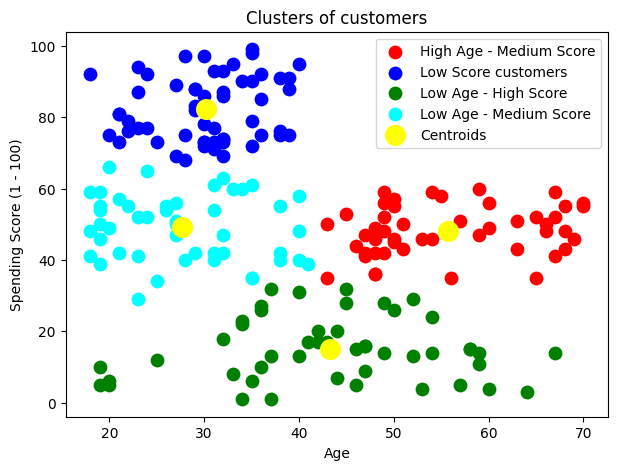

In [ ]:
### Visualizing the clusters

plt.figure(figsize = (7, 5))
plt.scatter(X_1[y_1_kmeans == 0, 0], X_1[y_1_kmeans == 0, 1], s = 80, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X_1[y_1_kmeans == 1, 0], X_1[y_1_kmeans == 1, 1], s = 80, c = 'blue', label = 'Low Score customers')
plt.scatter(X_1[y_1_kmeans == 2, 0], X_1[y_1_kmeans == 2, 1], s = 80, c = 'green', label = 'Low Age - High Score')
plt.scatter(X_1[y_1_kmeans == 3, 0], X_1[y_1_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [ ]:
### Calculating the performance of the clusters

silhouette_score_1_kmeans = round(silhouette_score(X_1, y_1_kmeans), 4)

print('Silhouette Score : {}'.format(silhouette_score_1_kmeans))

Silhouette Score : 0.4997


### 2.Annual Income and Spending Score

In [ ]:
# Filtering the annual income and spending score from the dataset

X_2 = customer[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

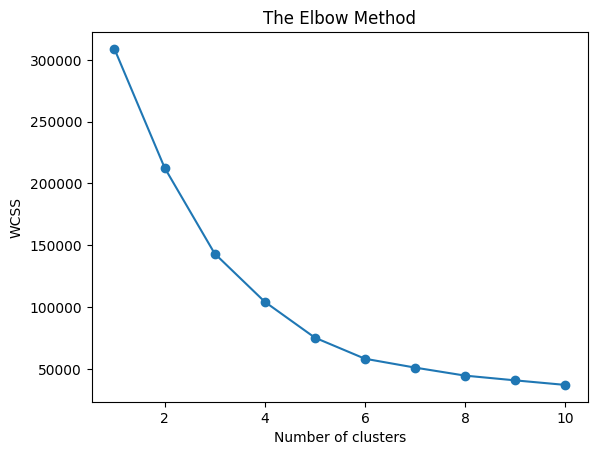

In [ ]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 5.

In [ ]:
# Training the K-Means model on the X_2 dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_2_kmeans = kmeans.fit_predict(X_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


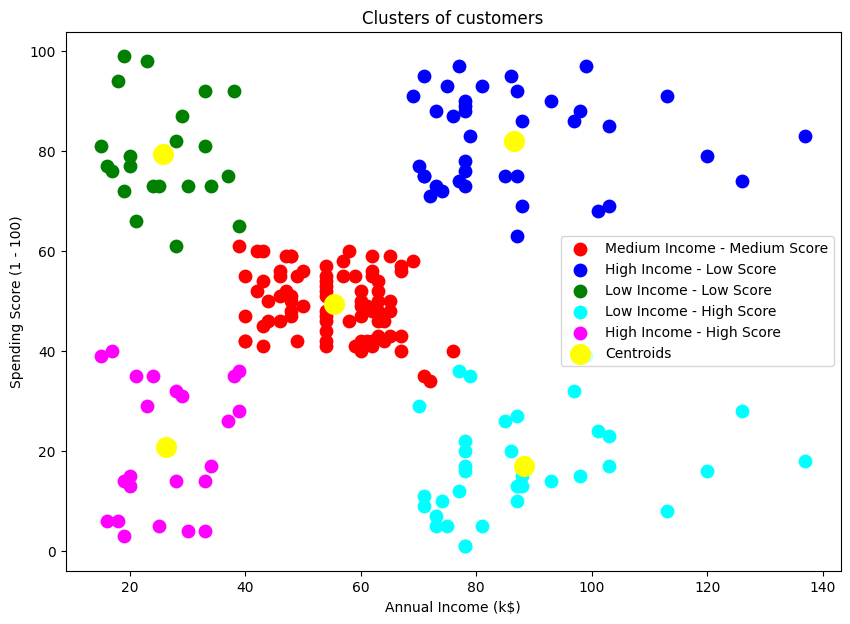

In [ ]:
# Visualizing the clusters

plt.figure(figsize = (10, 7))
plt.scatter(X_2[y_2_kmeans == 0, 0], X_2[y_2_kmeans == 0, 1], s = 80, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X_2[y_2_kmeans == 1, 0], X_2[y_2_kmeans == 1, 1], s = 80, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X_2[y_2_kmeans == 2, 0], X_2[y_2_kmeans == 2, 1], s = 80, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X_2[y_2_kmeans == 3, 0], X_2[y_2_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X_2[y_2_kmeans == 4, 0], X_2[y_2_kmeans == 4, 1], s = 80, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [ ]:
# Calculating the performance of the clusters

silhouette_score_2_kmeans = round(silhouette_score(X_2, y_2_kmeans), 4)

print('Silhouette Score : {}'.format(silhouette_score_2_kmeans))

Silhouette Score : 0.5539


### 3.Age, Annual Income, and Spending Score

In [ ]:
# Filtering the age, annual income and spending score from the dataset

X_3 = customer[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

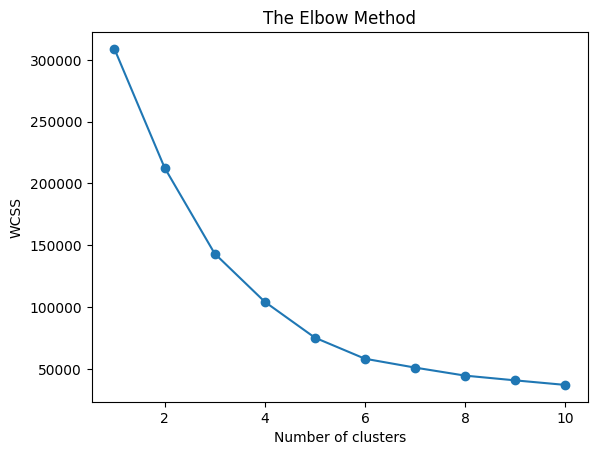

In [ ]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the optimal number of clusters are 6.

In [ ]:
# Training the K-Means model on the X_3 dataset

kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_3_kmeans = kmeans.fit_predict(X_3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


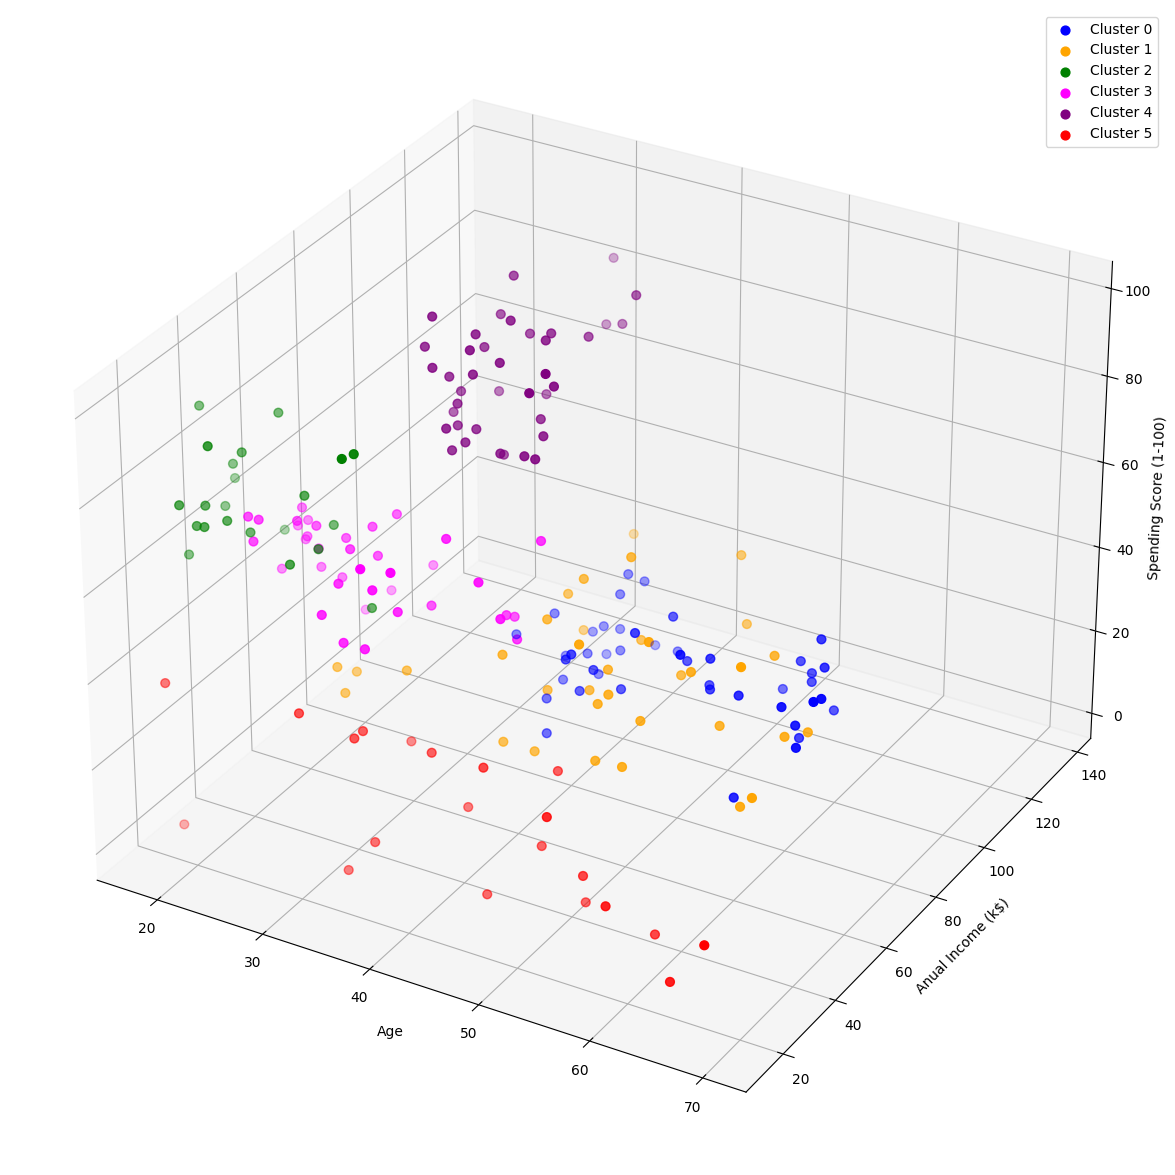

In [ ]:
# Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_3[y_3_kmeans == 0, 0], X_3[y_3_kmeans == 0, 1], X_3[y_3_kmeans == 0, 2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(X_3[y_3_kmeans == 1, 0], X_3[y_3_kmeans == 1, 1], X_3[y_3_kmeans == 1, 2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(X_3[y_3_kmeans == 2, 0], X_3[y_3_kmeans == 2, 1], X_3[y_3_kmeans == 2, 2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(X_3[y_3_kmeans == 3, 0], X_3[y_3_kmeans == 3, 1], X_3[y_3_kmeans == 3, 2], s = 40 , color = 'magenta', label = "Cluster 3")
ax.scatter(X_3[y_3_kmeans == 4, 0], X_3[y_3_kmeans == 4, 1], X_3[y_3_kmeans == 4, 2], s = 40 , color = 'purple', label = "Cluster 4")
ax.scatter(X_3[y_3_kmeans == 5, 0], X_3[y_3_kmeans == 5, 1], X_3[y_3_kmeans == 5, 2], s = 40 , color = 'red', label = "Cluster 5")
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [ ]:
# Calculating the performance of the clusters

silhouette_score_3_kmeans = round(silhouette_score(X_3, y_3_kmeans), 4)

print('Silhouette Score : {}'.format(silhouette_score_3_kmeans))

Silhouette Score : 0.4523
